<a href="https://colab.research.google.com/github/WojciechMojsiejuk/Artificial_Intelligence_SEOULTECH/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment #1

* Release date: 2022.09.27 Tue
* Due date: **2022.10.04 Tue 23:59** (will not accept late submission)
* Submission format: notebook file which can be executed in Colab environment
* Weighting: 5% (total 50 pts)

1. **(10pts)** Calculate `rotation*x` and `x*rotation`. Explain how each computation is performed and why two results are the same.

  ```python
    import numpy as np

    x = np.array([[2, 0]])
    rotation = np.array([ [0, -1],
                          [1,  0] ])
  ```

In [ ]:
    import numpy as np

    x = np.array([[2, 0]])
    rotation = np.array([ [0, -1],
                          [1,  0] ])

Let's check what are the result of `x*rotation` and `rotation*x`

In [ ]:
x*rotation

array([[0, 0],
       [2, 0]])

In [ ]:
rotation*x

array([[0, 0],
       [2, 0]])

Let's check dimmensionality of our tensors

In [ ]:
x.shape

(1, 2)

In [ ]:
rotation.shape

(2, 2)

## Answer:

Because of the broadcasting it is possible for us to compute the values in both conditions.

## Proof:

From the documentation of [numpy.multiply](https://numpy.org/doc/stable/reference/generated/numpy.multiply.html)
```python
numpy.multiply(x1, x2, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj]) = <ufunc 'multiply'>
```
Multiply arguments element-wise.

Parameters
x1, x2array_like
Input arrays to be multiplied. If x1.shape != x2.shape, they must be **broadcastable** to a common shape (which becomes the shape of the output).

## General Broadcasting Rules

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when

- they are equal, or

- one of them is 1

[Source](https://numpy.org/doc/stable/user/basics.broadcasting.html)

As we can see in our situation `x.shape` is `(1, 2)` which means it follows a second rule and therefore can be broadcasted (stretched) to match `rotation` dimensionality.

In [ ]:
x_broadcasted = np.array([[2, 0],[2, 0]]) #we repeat the values of x to match the dimensionality of rotated matrix

In [ ]:
x_broadcasted.shape == rotation.shape # let's check if our broadcasted matrix is compatible with rotation matrix

True

Let us compute the values manually

\begin{equation}
x^{\text{broadcasted}} =
\begin{bmatrix}
2 & 0\\
2 & 0
\end{bmatrix}
\end{equation}

\begin{equation}
\text{rotation} =
\begin{bmatrix}
0 & -1\\
1 & 0
\end{bmatrix}
\end{equation}





\begin{equation}
x^{\text{broadcasted}}\cdot\text{rotation} =
\begin{bmatrix}
2 & 0\\
2 & 0
\end{bmatrix}\cdot
\begin{bmatrix}
0 & -1\\
1 & 0
\end{bmatrix}
\end{equation}
=
\begin{bmatrix}
2\cdot0 & 0\cdot -1\\
2\cdot1 & 0\cdot 0
\end{bmatrix}
⇒
\begin{bmatrix}
0 & 0\\
2 & 0
\end{bmatrix}

In [ ]:
x_broadcasted*rotation

array([[0, 0],
       [2, 0]])

From Commutative Property of Multiplication we know that for an element-wise multiplication $a\cdot b = b\cdot a$, but nonetheless let's check other computation

\begin{equation}
\text{rotation} \cdot x^{\text{broadcasted}}=
\begin{bmatrix}
0 & -1\\
1 & 0
\end{bmatrix}
\cdot
\begin{bmatrix}
2 & 0\\
2 & 0
\end{bmatrix}
\end{equation}
=
\begin{bmatrix}
0\cdot2 & -1\cdot 0\\
1\cdot2 & 0\cdot 0
\end{bmatrix}
⇒
\begin{bmatrix}
0 & 0\\
2 & 0
\end{bmatrix}

In [ ]:
rotation*x_broadcasted

array([[0, 0],
       [2, 0]])

2. **(5pts)** Suppose we have the following 2D tensor (i.e., a matrix). How to rearrange its values into 1D tensor (i.e., a vector) in a column major order?
```python
x = np.array([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]])
```

To flatten tensor to vector we can use [np.ravel](https://numpy.org/devdocs/reference/generated/numpy.ravel.html) method. To obtain a column major order we might specify a `order`parameter of a function and set it to `F` where `F` means to index the elements in column-major, Fortran-style order.

In [ ]:
from pprint import pprint

x = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]])

x_vector_cmo = np.ravel(x, order='F') 

pprint(x_vector_cmo)

array([ 1,  5,  9,  2,  6, 10,  3,  7, 11,  4,  8, 12])


3. **(5pts)** Compute a transpose of the matrix `x` in Problem 2 by using only `np.reshape` function.

In [ ]:
x.shape

(3, 4)

For this task we could use our previously computed 1D vector and reshape it to swap axes $(3,4)⇒(4,3)$ 

In [ ]:
x_t = np.reshape(x_vector_cmo,(4,3))

or write np.ravel function as np.reshape where we specify the size of our matrix as (1, number of elements)


In [ ]:
x_t2 = np.reshape(np.reshape(x,(1,12),order='F'),(4,3))

As we can see both approaches give us the same result, which also matches the built-in functions for transposing matrix

In [ ]:
pprint(x_t)
pprint(x_t2)
print(x_t.shape)
pprint(x.T) # built-in function for transposing 
pprint(np.transpose(x)) # built-in function for transposing

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])
array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])
(4, 3)
array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])
array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])


4. **(5pts)** Perform vector arithmetic to create a `primes_squared_minus_one` vector, where the `i`th element is equal to the `i`th element in `primes` squared minus 1. For example, the second element of `primes_squared_minus_one` would be equal to `3^2 - 1 = 8`. Note that using `for` loop is not allowed.
```python
import numpy as np
primes = np.array([2, 3, 5, 7, 11, 13])
primes_squared_minus_one = ?
```

In [ ]:
primes = np.array([2, 3, 5, 7, 11, 13])
primes_squared_minus_one = primes**2-1
pprint(primes_squared_minus_one)

array([  3,   8,  24,  48, 120, 168])


5. **(10pts)** Given any random matrices, compute the element-wise multiplication using a naive Python implementation and Numpy built-in function respectively. Compare the wall-clock times of these implementations as the size of matrices increases.



In [ ]:
def naive_mul(x, y):
  '''
  naive_mul(x,y) 
  Returns the element-wise multiplication of two tensors of at most 2D.

            Parameters:
                    x (np.ndarray): first tensor of at most two dimensions
                    y (np.ndarray): second tensor of at most two dimensions decimal integer

            Returns:
                    xy_mul (np.ndarray): element-wise multiplication of x and y
  '''
  try: 
    assert x.shape == y.shape
  except AssertionError:
      if len(x.shape) == 1:
        if x.shape[0] == 1: 
          x=np.ones_like(y)*x
        elif x.shape[0] == y.shape[1]:
          temp = x.copy()
          x = np.ones_like(y)
          x[:,0]=temp
          x[:,1]=temp
        else:
          raise ValueError(f'could not broadcast input array from shape {x.shape} into shape {y.shape}.')
      elif len(y.shape) == 1:
        if y.shape[0] == 1: 
          y=np.ones_like(x)*y
        elif y.shape[0] == x.shape[1]:
          temp = y.copy()
          y = np.ones_like(x)
          y[:,0]=temp
          y[:,1]=temp
        else:
          raise ValueError(f'could not broadcast input array from shape {x.shape} into shape {y.shape}.')
      else:
        raise ValueError(f'could not broadcast input array from shape {x.shape} into shape {y.shape}.')
  xy_mul = x.copy()
  for i in range(xy_mul.shape[0]):
    for j in range(xy_mul.shape[1]):
      xy_mul[i, j] *= y[i, j]
  return xy_mul

Testing solution for matrix * vector situations (not mandatory for this assignment, I just wanted to practise broadcasting).

In [ ]:
x=np.random.rand(2,2)
y=np.random.rand(2)

pprint(x)
pprint(y)
pprint(naive_mul(x,y))

array([[0.46490964, 0.22660092],
       [0.45417363, 0.58932149]])
array([0.93277473, 0.50754188])
array([[0.43365596, 0.21136761],
       [0.23051214, 0.29910534]])


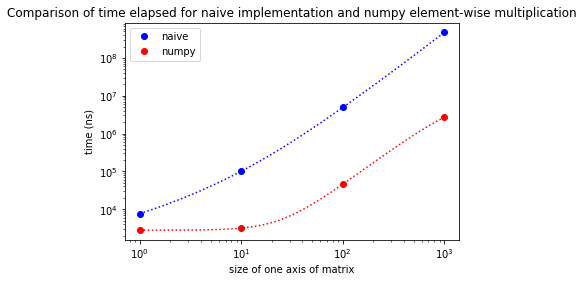

In [ ]:
import time
import matplotlib.pyplot as plt

SIZE = [10**x for x in range(0, 4)]
naive_time = []
numpy_time = []

for idx, size in enumerate(SIZE):
  temp_naive_time = 0
  temp_numpy_time = 0
  for i in range(10): # Let's repeat the process few times and compute the mean to neglect the latency
    x=np.random.rand(size, size)
    y=np.random.rand(size, size)
    
    #naive implementation
    start = time.time_ns() 
    naive_ans = naive_mul(x,y)
    elapsed = time.time_ns()  - start
    temp_naive_time += elapsed
    
    #numpy
    start = time.time_ns() 
    numpy_ans = x*y
    elapsed = time.time_ns()  - start
    temp_numpy_time += elapsed

    #verification
    assert np.abs(naive_ans-numpy_ans).all() < 10**-3

  naive_time.append(temp_naive_time/10)
  numpy_time.append(temp_numpy_time/10)

p_naive = np.poly1d(np.polyfit(SIZE, naive_time, 3))
p_numpy = np.poly1d(np.polyfit(SIZE, numpy_time, 3))
xp = np.logspace(0,3,100)

plt.plot(SIZE, naive_time, 'bo', label='naive')
plt.plot(xp,p_naive(xp), 'b:')
plt.plot(SIZE, numpy_time, 'ro', label='numpy')
plt.plot(xp,p_numpy(xp), 'r:')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('size of one axis of matrix')
plt.ylabel('time (ns)')
plt.legend()
plt.title("Comparison of time elapsed for naive implementation and numpy element-wise multiplication")
plt.show()

As it can be seen naive implementation is usually 10-100 time slower than an optimized solution from numpy library. It can be observed that the difference between the solution is somewhat steady no matter the size of the matrices (except for really small matrices; $n<10$)

6. **(15pts)** Consider MNIST classification problem covered during the class. For the details, please refer to the course material. In this example, we used the multilayer perceptron composed of an input layer with 512 hidden nodes and an output layer that produces predicted probabilities over 10 classes. In the class, we used GPU as a hardware accelerator to train our model.

  Here, let's verify the actual benefit of using GPU for training. For this, compare the wall-clock times in the case of 1) using CPU and 2) using GPU to train MNIST classifier.


In [ ]:
!pip install --upgrade tensorflow
import tensorflow as tf
tf.__version__
from tensorflow import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 17 kB/s 
     |████████████████████████████████| 5.9 MB 61.6 MB/s 
     |████████████████████████████████| 1.7 MB 55.6 MB/s 
     |████████████████████████████████| 438 kB 69.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
!nvidia-smi #check if we use GPU

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
from keras import models
from keras import layers
from keras.utils import to_categorical
import time

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

start = time.time()
network.fit(train_images, train_labels, epochs=5, batch_size=128)
elapsed = time.time() - start

print('Elapsed time (CPU): %.4f' % elapsed)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2571 - accuracy: 0.9277
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1039 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0685 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0498 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0372 - accuracy: 0.9889
Elapsed time (CPU): 26.6657


Let's now enable GPU

In [ ]:
!nvidia-smi #check if we use GPU

Tue Sep 27 10:37:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
import time

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

start = time.time()
network.fit(train_images, train_labels, epochs=5, batch_size=128)
elapsed = time.time() - start

print('Elapsed time (GPU): %.4f' % elapsed)

Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
469/469 [==============================] - 5s 3ms/step - loss: 0.2535 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1028 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9886
Elapsed time (GPU): 11.0071


```
Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2571 - accuracy: 0.9277
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1039 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0685 - accuracy: 0.9800
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0498 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0372 - accuracy: 0.9889
Elapsed time (CPU): 26.6657
```

```
Epoch 1/5
469/469 [==============================] - 5s 3ms/step - loss: 0.2535 - accuracy: 0.9259
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1028 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0488 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0370 - accuracy: 0.9886
Elapsed time (GPU): 11.0071
```
As we can see using GPU increased the speed of the training our model. Without GPU it took 26s to train model. With GPU it took only 11s.